# **Tercera Evaluación de Física Computacional 1 (2021-1)**
(3 de Mayo de 2021)

La Ecuación de Reacción-Difusión en una dimensión está dada por la ecuación diferencial parcial

$$\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + R(u)
\end{equation*}$$

donde $D$ es el coeficiente de difusión y $R(u)$ es una función de reacción. La forma de la función $R(u)$, puede describir una colección amplia de fenómenos físicos.

Comúnmente la ecuación de reacción difusión se utiliza para estudiar la evolución temporal de una mezcla de componentes químicos que reaccionan entre si, por ejemplo

$$\begin{equation*}
2 H_2 + O_2 \xrightarrow[\leftarrow]{}  2 H_2 O
\end{equation*}$$

donde se mezclan 2 moleculas de Hidrógeno y una oxígeno, para formar agua, con ayuda de un catalizador que facilite la reacción.

Se pide trabajar el caso donde $R(u) = \alpha u$, siendo $\alpha$ el coeficiente de reacción.

Entonces nos interesa resolver la ecuación

$$\begin{equation*}
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2} + \alpha u
\end{equation*}$$

Aquí $u$ denotaría la concentración del compuesto químico. Si $\alpha=0$, la ecuación anterior se reduce a una simple ecuación de difusión como la que vimos en la ecuación del calor.

Supondremos que $D=1$ y $\alpha=-1$.

Resuelve numéricamente la ecuación de reacción-difusión en una dimensión, para estudiar la evolución de un modelo simple de reacción-difusión de mezclar moleculas de $2 H_2$ con $O_2$ en un tubo unidimensional de longitud $L=1$ en la dirección $x$, y que inicialmente se encuentra vacío $u(x,0)=0$ como se muestra en la siguiente figura



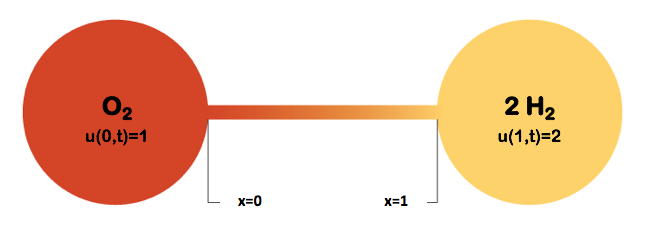

Se pide adaptar el código desarrolado en el sitio del curso de Numerical Methods using Python del Dr. Vivi Andasari de la Universidad de Boston.

En la sesión 15, se describen los algoritmos por si desean consultar los detalles. Se resuelve la ecuación de Reacción-Difusión en una dimensión, usando métodos de diferencia finita (Backward Time Centered Space - BTCS). Se provee el código para problemas de condiciones a la frontera tipo Dirichlet y también para el tipo Neumann.

Por favor descarga ambos códigos para cada caso, dado que se utilizarán en los siguientes 2 problemas.

In [1]:
import numpy as np
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

**Problema 1:**

Resuelve numéricamente la ecuación de reacción-difusión para el caso de condiciones de frontera tipo Dirichlet por el método de BTCS, con condición inicial $u(x,0)=0$, y condiciones a la frontera $u(0,t)=1$ y $u(1,t)=2$, para un tiempo $t=0,..,1$.

Muestra una gráfica de la evolución temporal de la reacción difusión de los compuestos.

True


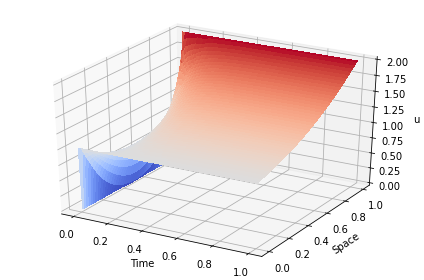

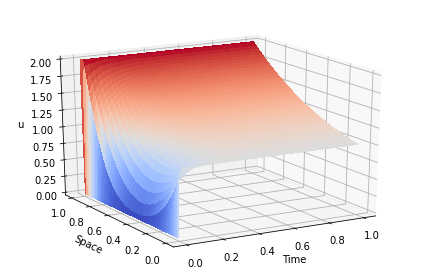

In [6]:
M = 100 # GRID POINTS on space interval
N = 300 # GRID POINTS on time interval
#Aumente los puntos para ver si mejoraba , lo hizo levemente
x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1 # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 #condicion de u(0,t)=1
U[-1,:] = 2.0 #condicion en la frontera L=2

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)
#____________________________
X1=X                       #-
T1=T                       #-
U1=U                       #-
#Para comparar en el 3

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('u')
plt.tight_layout()

plt.show()

#------------------#################################--------------

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('u')
plt.tight_layout()
ax.view_init(20, -120)
plt.show()

Las gráficas muestran la densidad del compuesto en función del tiempo y el espacio del tubo. Esta densidad la denotamos como ***u***, y vemos cómo evoluciona a partir de cero hasta estabilizarse.

**Problema 2:**

Ahora supondremos que se colocan reguladores de presión, que permiten flujo de los gases desde los reservorios hacia el tubo inicialmente vacío $u(x,0) = 0$. En $x=0$, el flujo de gas es $\partial u/\partial x (0,t) = 0.1$ y en $x=1$ el flujo $\partial u/\partial x (1,t) = 0.2$.

Se pide realizar una simulación numérica de este escenario para $=0,..,10$.

True


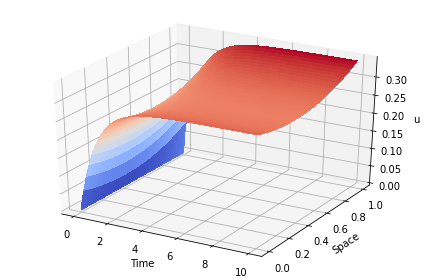

In [7]:
#Usamos las condiciones de Neumann

'''
Backward method to solve 1D reaction-diffusion equation:
    u_t = D * u_xx + alpha * u
    
with Neumann boundary conditions 
at x=0: u_x = sin(pi/2)
at x=L: u_x = sin(3*pi/4) with L=1
and initial condition u(x,0) = 4*x - 4*x**2
'''

M = 120 # GRID POINTS on space interval
N = 200 # GRID POINTS on time interval

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 10

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1  # Diffusion coefficient
alpha = -1 # Reaction rate

r = dt*D/dx**2
s = dt*alpha
a = 1 + 2*r - s


xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M))
off_diag = -r*np.ones((1, M-1))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
A[0,1] = -2*r
A[M-1,M-2] = -2*r

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0 #inicialmente en el vacio

#----- Neumann boundary conditions -----
#leftBC = np.arange(1, N+1)
#print(leftBC)
f = 0.1*np.ones([N +1,1]) #en x=0 para cualquier tiempo vale 0.1

#rightBC = np.arange(1, N+1)
g = 0.2 *np.ones([N+1,1]) #en la frontera derecha en x=L=1 vale 0.2 para cualquier t


for k in range(1, N):
    c = np.zeros((M-2,1)).ravel()
    b1 = np.asarray([2*r*dx*f[k], 2*r*dx*g[k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[0:M, k-1])
    b = b1 + b2  # Right hand side
    U[0:M, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
gc = np.allclose(np.dot(A,U[0:M,N-1]), b)
print(gc)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)

#ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
#ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])

ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('u')
plt.tight_layout()
plt.show()

En esta gráfica se muestra el aumento de la densidad ***u*** en el tiempo, hasta estabilizarse.

**Problema 3:**

¿Que pasaría en el caso de que se mezclaran dos gases que no reaccionan entre si, como sería mezclar dos recipientes con el mismo tipo de gas (el coeficiente de reacción $\alpha=0$)?.

Suponga que inicialmente el tubo está vacío $u(x,0)=0$ y la concentración en $u(0,t)=1$ y $u(1,t)=2$.

Resuelva numéricamente este caso.

True


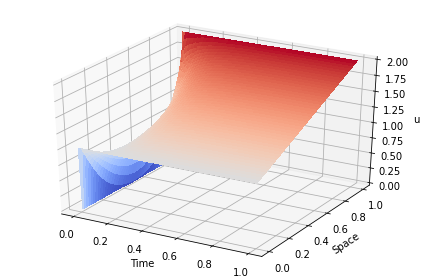

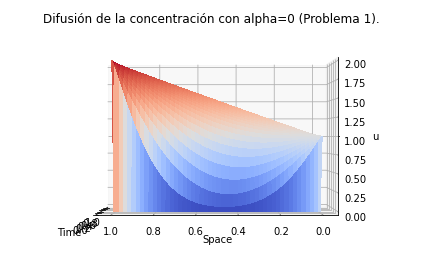

In [12]:
#Backward method to solve 1D reaction-diffusion equation:
#    u_t = D * u_xx + alpha * u
    
#with Dirichlet boundary conditions u(x0,t) = 0, u(xL,t) = 0
#and initial condition u(x,0) = 4*x - 4*x**2

M = 100 # GRID POINTS on space interval  
N = 300 # GRID POINTS on time interval 

x0 = 0
xL = 1

# ----- Spatial discretization step -----
dx = (xL - x0)/(M - 1)

t0 = 0
tF = 1

# ----- Time step -----
dt = (tF - t0)/(N - 1)

D = 1 # Diffusion coefficient
alpha = 0 # Reaction rate

r = dt*D/dx**2
s = dt*alpha;

xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)

main_diag = (1 + 2*r - s)*np.ones((1,M-2))
off_diag = -r*np.ones((1, M-3))

a = main_diag.shape[1]

diagonals = [main_diag, off_diag, off_diag]

A = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()

# ----- Initializes matrix U -----
U = np.zeros((M, N))

#----- Initial condition -----
U[:,0] = 0.0 

#----- Dirichlet boundary conditions -----
U[0,:] = 1.0 
U[-1,:] = 2.0 

for k in range(1, N):
    c = np.zeros((M-4,1)).ravel()
    b1 = np.asarray([r*U[0,k], r*U[-1,k]])
    b1 = np.insert(b1, 1, c)
    b2 = np.array(U[1:M-1, k-1])
    b = b1 + b2  # Right hand side
    U[1:M-1, k] = np.linalg.solve(A,b)  # Solve x=A\b

# ----- Checks if the solution is correct:
g = np.allclose(np.dot(A,U[1:M-1,N-1]), b)
print(g)

# ----- Surface plot -----
X, T = np.meshgrid(tspan, xspan)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('u')
plt.tight_layout()
plt.show()

###############-------------########

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, T, U, linewidth=0,
                       cmap=cm.coolwarm, antialiased=False)
ax.set_xlabel('Time')
ax.set_ylabel('Space')
ax.set_zlabel('u')
plt.title('Difusión de la concentración con alpha=0 (Problema 1).')
ax.view_init(0, -180)
plt.tight_layout()
plt.show()

En este caso vemos que el coeficiente de reacción es mayor que en el primer problema, por lo que la concentración es mayor. De manera que podemos decir que conforme aumenta la concentración de la sustancia, mayor es el coeficiente de concentración, y viceversa. 

**NOTA:** Describa en cada problema, lo que se realiza y comente los resultados de su simulación. Si hay alguna observación o comentario adicional que desee hacer, hágalo por favor.

Al finalizar la evaluación, por favor guarde su cuaderno de Jupyter llamado Evaluación3 en su repositorio Github del curso y anote su avance.

Gracias por participar. ¡Suerte!